# Kopp et al 2021 Evaluation 
**Authorship:**
Adam Klie, *08/12/2022*
***
**Description:**
Notebook to perform a brief evaluation of trained models on the Kopp21 et al dataset.
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Global seed set to 13
/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/kipoi_veff/seqplotting_deps.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/kipoi_veff/seqplotting_deps.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Configure EUGENe 
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/kopp21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/kopp21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/kopp21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/kopp21"
figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/kopp21"
eu.settings.verbosity = logging.ERROR

# Load in the test `SeqData`(s)

In [3]:
# Load in the training data that's been predicted on
sdata_test = eu.dl.read_h5sd(
    filename=os.path.join(eu.settings.dataset_dir, "jund_test_processed.h5sd")
)
sdata_test

SeqData object with = 64309 seqs
seqs = (64309,)
names = (64309,)
rev_seqs = (64309,)
ohe_seqs = (64309, 500, 4)
ohe_rev_seqs = (64309, 500, 4)
seqs_annot: 'chr', 'end', 'start', 'target', 'train_test'
pos_annot: None
seqsm: None
uns: None

# Generate performance figures

In [8]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_test,
    target="target",
    prediction_groups=["dsFCN"] + ["dsCNN"] + ["dsRNN"] + ["dsHybrid"],
    hue="prediction_groups",
    metrics=["accuracy", "precision", "recall", "f1", "average_precision", "roc_auc"],
    figsize=(6, 6)
)

# Identify the best model from returned model scores
auprc_sorted = model_scores["average_precision"].sort_values(ascending=False)
auprc_sorted.plot(kind="bar", ylabel="auPRC")
#plt.savefig(os.path.join(figure_dir, "performance_summary.png"))
plt.show()

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


: 

: 

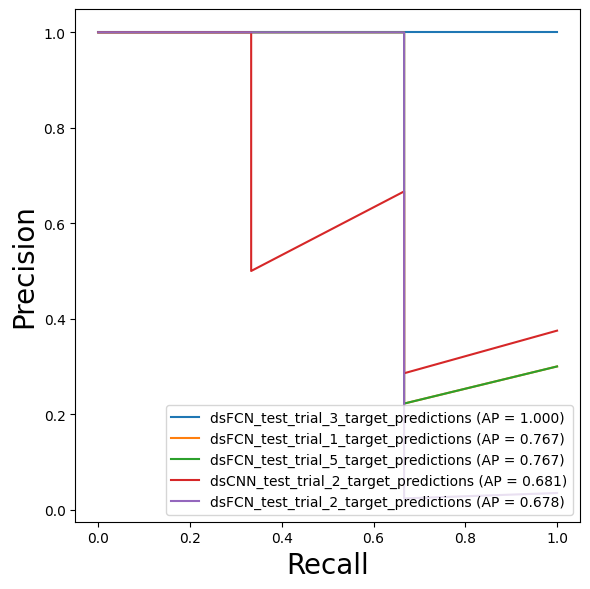

In [75]:
# Plot the performances across species for the best model
best_preds = auprc_sorted.index[:5]
eu.pl.auprc(
    sdata_sub, 
    targets=["target"]*5, 
    predictions=best_preds,
    labels=best_preds,
)
plt.show()

---

# Scratch